In [1]:
from biosonic import handle, compute, plot
from biosonic.compute import pitch

## Read file and plot spectrogram

In [2]:
x, sr, n_ch, quant = handle.read_wav("GT00211_G00908_Julian_distance.wav")
print(f"sampling rate: {sr}, number of channels: {n_ch}, quantization: {quant}")

sampling rate: 44100, number of channels: 1, quantization: float32


/Users/lena/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:116: RuntimeWarning: divide by zero encountered in log10
  Sx = 20 * np.log10(Sx / ref)


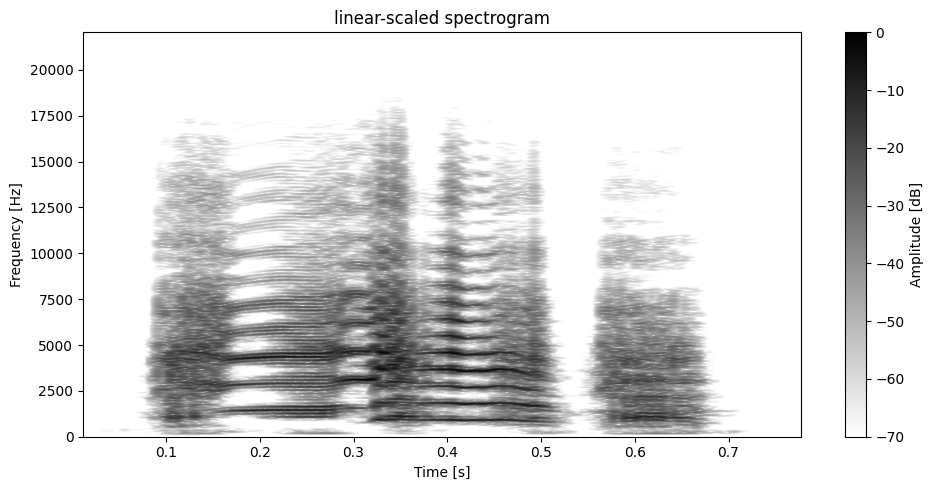

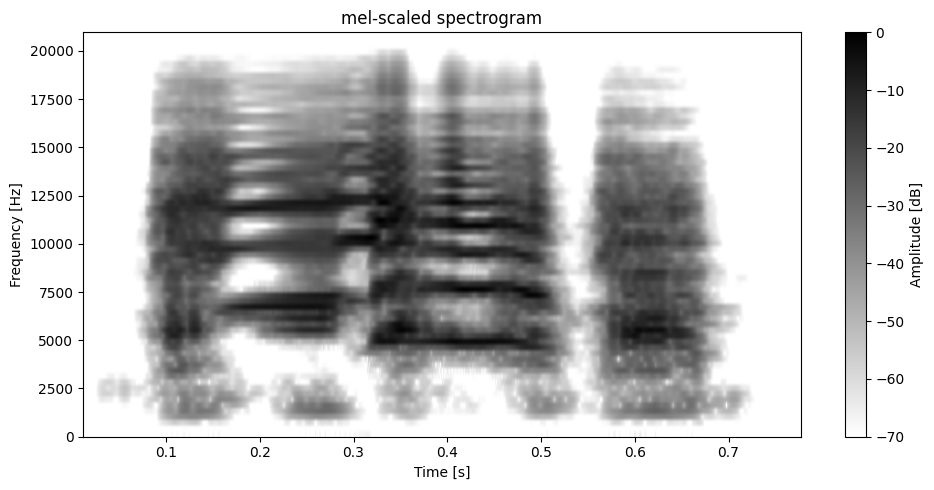

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'mel-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>)

In [3]:
window_length = 1024

# display , ,bwith a dynamic range of 70 dB, first linearly scaled, then mel scaled with a custom corner frequency
plot.plot_spectrogram(x, sr=sr, window_length=window_length, overlap=95, dynamic_range=70)
plot.plot_spectrogram(x, sr=sr, window_length=window_length, overlap=95, dynamic_range=70, freq_scale="mel", n_bands=70)

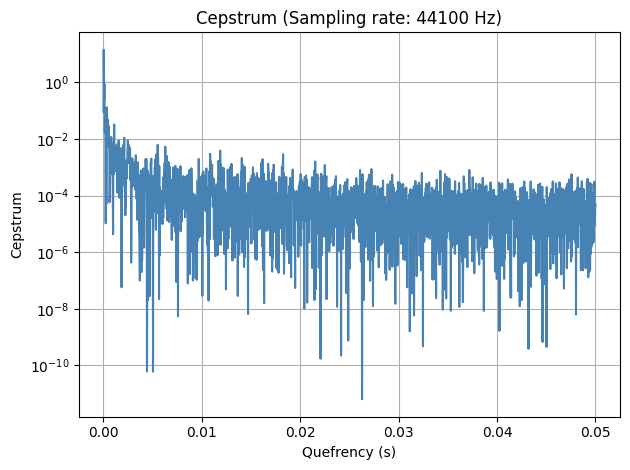

In [4]:
ceps, _ = compute.spectrotemporal.cepstrum(x, sr)
plot.plot_cepstrum(x, sr)

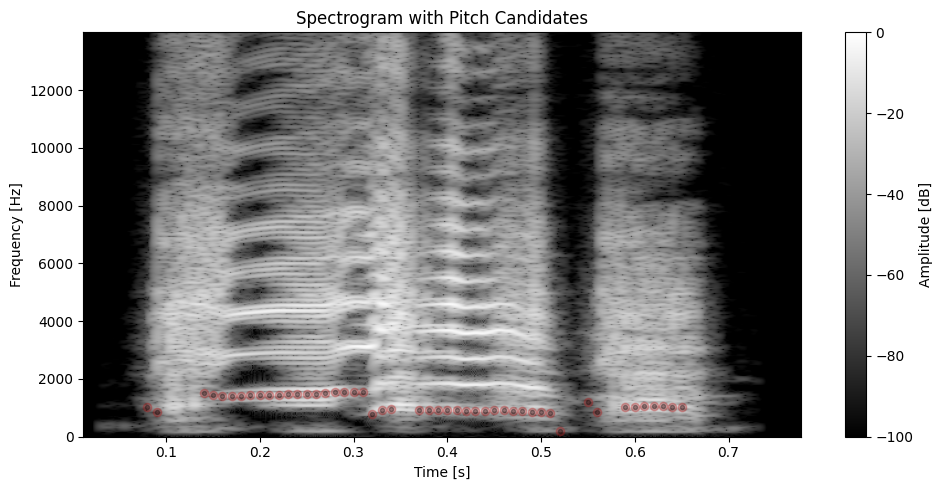

In [5]:
# praat autocorrelation pitch tracking
time_points, candidates = pitch.boersma(x, sr, min_pitch=100, max_pitch=2000, voicing_thresh=.4, timestep=0.01)
Sx, t, f = compute.spectrotemporal.spectrogram(x, sr=sr, window='hann', window_length=window_length, overlap=95)
plot.plot_pitch_on_spectrogram(x, sr, time_points, candidates, window_length=window_length, overlap=95, flim=(0,14000))

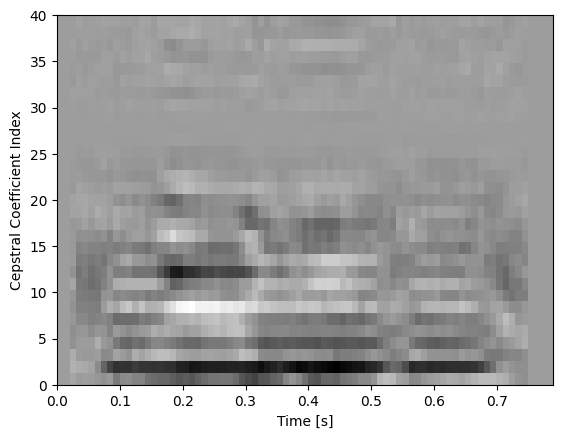

In [6]:
plot.plot_cepstral_coefficients(x, sr, window_length)

/Users/lena/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:291: RuntimeWarning: divide by zero encountered in log10
  spectrogram_db = 20 * np.log10(np.abs(spec))


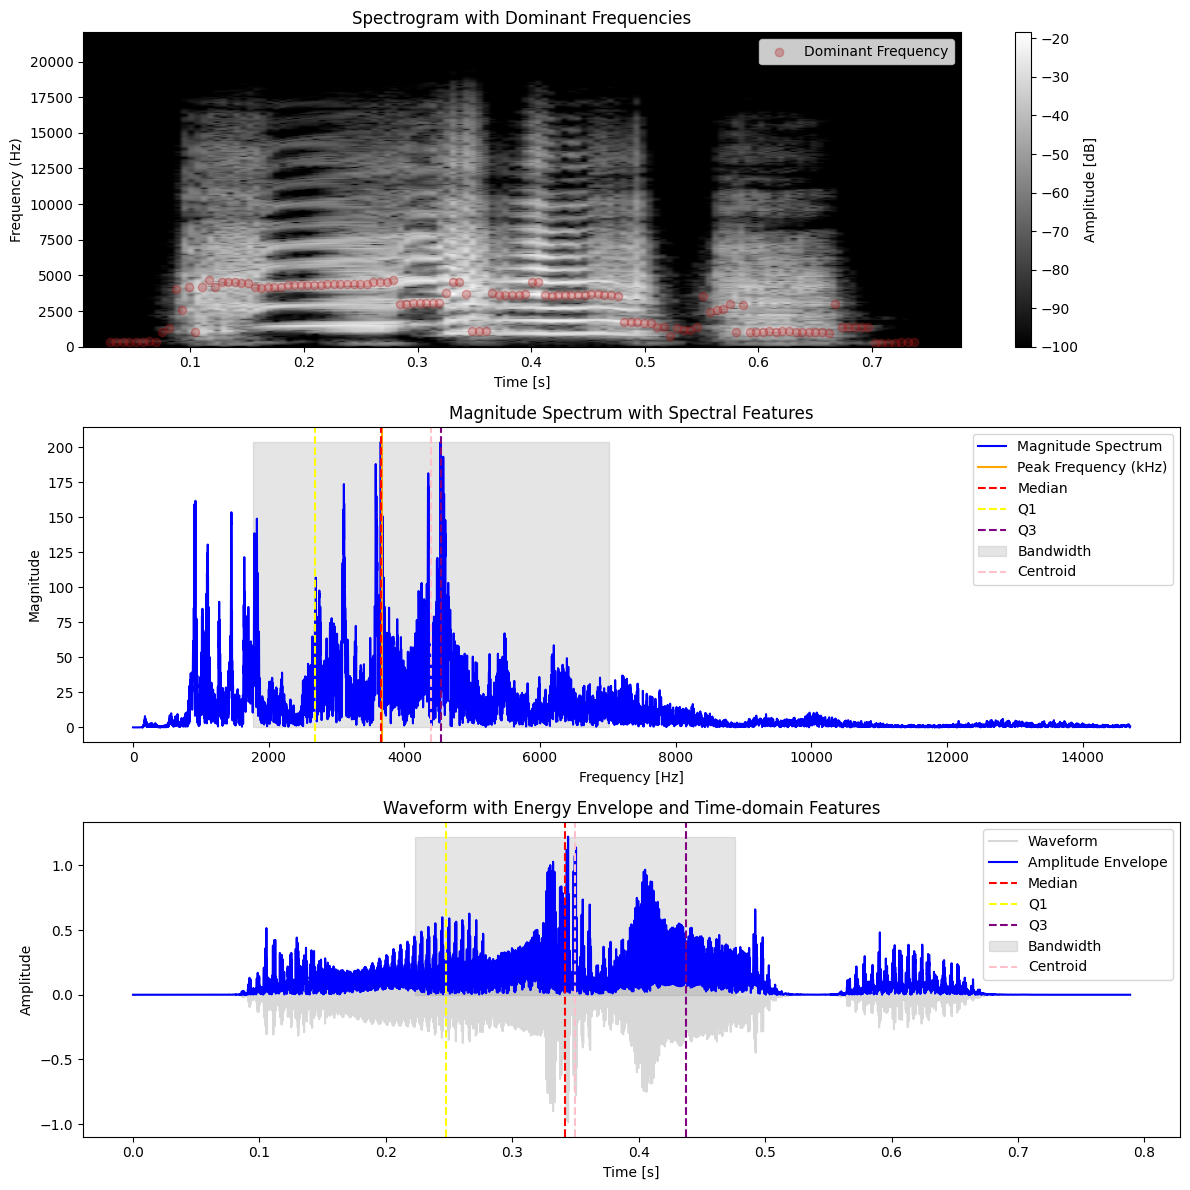

In [7]:
features = compute.utils.extract_all_features(x, sr)
plot.plot_features(x, sr)

In [8]:
features

{'t_q1': 0.2472108843537415,
 't_median': 0.3418140589569161,
 't_q3': 0.43732426303854877,
 'temporal_centroid': np.float64(0.34988581955252146),
 'temporal_sd': 0.126491978764534,
 'temporal_skew': 2.0511107444763184,
 'temporal_kurtosis': 6.910249710083008,
 'amplitude_envelope': array([2.4457245e-07, 1.3555872e-07, 3.3347465e-07, ..., 2.6672060e-07,
        2.7988116e-07, 1.6845513e-07], shape=(34783,), dtype=float32),
 'duration': 0.7029478458049887,
 'fq_q1': np.float64(2689.1326222579996),
 'fq_median': np.float64(3652.706782048702),
 'fq_q3': np.float64(4533.869993962568),
 'spectral_flatness': np.float32(0.0015890924),
 'spectral_centroid': np.float64(4397.607080816702),
 'spectral_sd': np.float64(2623.1005118607272),
 'spectral_skew': np.float64(1.4020422729342061),
 'spectral_kurtosis': np.float64(6.020083572233632),
 'peak_frequency': 3665.385389414369,
 'spectrotemporal_entropy': 0.4952921531292713,
 'dominant_freqs': array([         nan,          nan,          nan,       

## Batch normalize files in a folder and export features as csv

In [9]:
handle.batch_normalize_wav_files(".", 44100, 1, "float32")

Normalized: GT00095.wav -> normalized/GT00095.wav
Normalized: Pica_pica_Magpie_12#45.wav -> normalized/Pica_pica_Magpie_12#45.wav
Normalized: GT00092.wav -> normalized/GT00092.wav
Normalized: GT00211_G00908_Julian_distance.wav -> normalized/GT00211_G00908_Julian_distance.wav
Normalized: Sturnus_vulgaris_Starling_10#20.wav -> normalized/Sturnus_vulgaris_Starling_10#20.wav


In [10]:
handle.batch_extract_features("normalized", save_csv_path="normalized/extracted_features.csv")

processing GT00095.wav
processing Pica_pica_Magpie_12#45.wav
processing GT00092.wav
processing GT00211_G00908_Julian_distance.wav
processing Sturnus_vulgaris_Starling_10#20.wav
Features saved to: normalized/extracted_features.csv


t_q1   t_median        t_q3  temporal_centroid  temporal_sd  \
0   0.356712   0.434649    0.578345           0.464992   420.678619   
1   6.647256  13.488844   39.570884          24.561517     0.061462   
2   7.241134  12.170249   15.785034          12.136268  1221.280518   
3   0.247211   0.341814    0.437324           0.349886     0.126492   
4  51.602494  98.482562  144.246576          92.980398     0.091809   

   temporal_skew  temporal_kurtosis  \
0       1.342939           0.455230   
1       4.453172          25.357691   
2       5.481099          33.892479   
3       2.051111           6.910250   
4       3.255796          13.761410   

                                  amplitude_envelope    duration        fq_q1  \
0  [83.765854, 65.70375, 72.79514, 74.21216, 76.1...    1.101519  1234.353454   
1  [2.5440222e-05, 3.400955e-05, 2.5448338e-05, 3...   79.730816  2874.206107   
2  [134.4127, 53.550514, 70.850235, 82.94359, 125...   22.695034  1217.355729   
3  [2.4457245e-07, 1.3555872e-07, 3.3347465e-07, ...    0.702948  2689.132622   
4  [4.746566e-05, 4.3317694e-05, 4.746617e-05, 4....  167.422993  2586.052814   

   ...  spectral_kurtosis  peak_frequency  spectrotemporal_entropy  \
0  ...          30.973869     1347.805059                 0.366730   
1  ...           6.146852     3022.660305                 0.309110   
2  ...          23.406637     1308.470157                 0.405543   
3  ...           6.020084     3665.385389                 0.495292   
4  ...          13.514758     2477.127537                 0.606184   

                                      dominant_freqs     mean_dom     min_dom  \
0  [86.1328125, 172.265625, 86.1328125, 689.0625,...   883.319481   86.132812   
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  6356.379914  689.062500   
2  [86.1328125, 258.3984375, 172.265625, 258.3984...   388.381887   86.132812   
3  [nan, nan, nan, nan, 344.53125, 344.53125, 344...  2647.008384  258.398438   
4  [nan, nan, nan, nan, nan, nan, nan, 15417.7734...  3960.221747   86.132812   

        max_dom     range_dom      mod_dom  \
0   2842.382812   2756.250000    19.531250   
1  21963.867188  21274.804688  2210.485830   
2   5167.968750   5081.835938   157.932203   
3   4651.171875   4392.773438    10.431373   
4  21963.867188  21877.734375   709.503937   

                              filename  
0                          GT00095.wav  
1           Pica_pica_Magpie_12#45.wav  
2                          GT00092.wav  
3   GT00211_G00908_Julian_distance.wav  
4  Sturnus_vulgaris_Starling_10#20.wav  

[5 rows x 26 columns]

## Parse raven selection table and extract segments from file

In [11]:
x, sr, _, _ = handle.read_wav("GT00092.wav", n_channels=1)

In [12]:
# get boundaries and plot
segments = handle.boundaries_from_raven("GT00092.txt")

In [13]:
segments

[{'begin': 3.936485261,
  'end': 4.880612245,
  'label': 'G00494_Kruemmel_distance call'},
 {'begin': 6.86138322,
  'end': 7.69952381,
  'label': 'G00495_Kruemmel_distance call'},
 {'begin': 10.721882086,
  'end': 11.508548753,
  'label': 'G00496_Kruemmel_distance call'},
 {'begin': 15.181882086,
  'end': 16.029138322,
  'label': 'G00497_Kruemmel_distance call'},
 {'begin': 16.919886621,
  'end': 17.894285714,
  'label': 'G00498_Kruemmel_distance call'}]

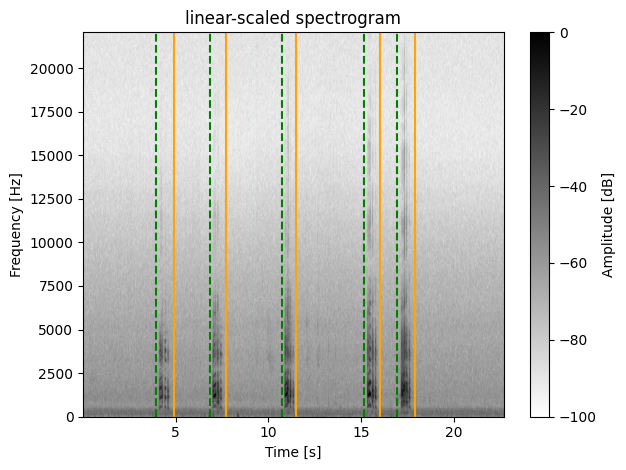

In [14]:
plot.plot_boundaries_on_spectrogram(x, sr, segments)

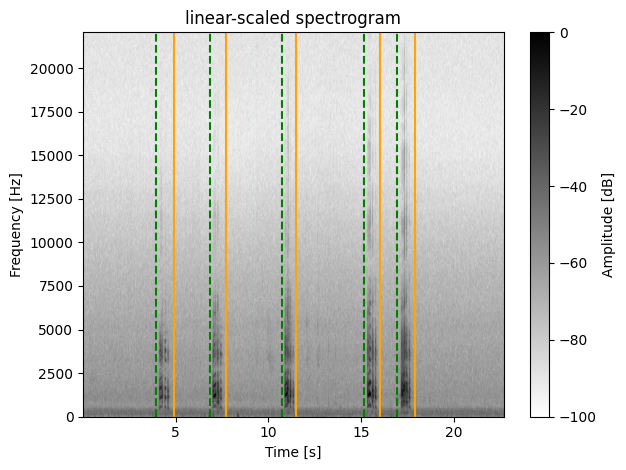

In [15]:
# or extract signal segments directly
audio_segments = handle.audio_segments_from_raven(x, sr, "GT00092.txt")

In [16]:
audio_segments

[{'data': array([  5. ,  40. ,  58.5, ...,  31.5,  60.5, 100. ],
        shape=(41637,), dtype=float32),
  'label': 'G00494_Kruemmel_distance call'},
 {'data': array([181. , 148.5,  86.5, ..., -87. , -84. , -84.5],
        shape=(36963,), dtype=float32),
  'label': 'G00495_Kruemmel_distance call'},
 {'data': array([-38.5, -34. , -57. , ...,  13. ,  31.5,  24.5],
        shape=(34694,), dtype=float32),
  'label': 'G00496_Kruemmel_distance call'},
 {'data': array([ 155.5,  166.5,  164. , ..., -122. , -122. ,  -93. ],
        shape=(37366,), dtype=float32),
  'label': 'G00497_Kruemmel_distance call'},
 {'data': array([ 99.5, 101.5, 103.5, ...,  23. ,  11. ,  18.5],
        shape=(42972,), dtype=float32),
  'label': 'G00498_Kruemmel_distance call'}]

(<Figure size 1000x300 with 2 Axes>,
 <Axes: title={'center': 'G00494_Kruemmel_distance call'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>)

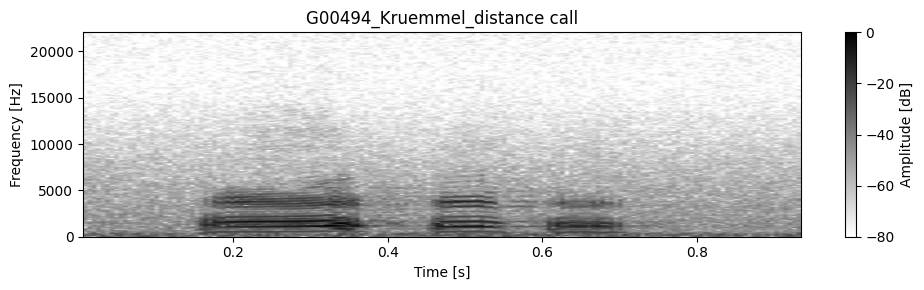

In [17]:
import matplotlib.pyplot as plt

segment = audio_segments[0]
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

plot.plot_spectrogram(segment["data"], sr, title=segment["label"], plot=(fig,ax), dynamic_range=80)

## Parse praat TextGrids and extract segments from file

This relies on the praat-textgrids library written by Tommi Nieminen:

https://github.com/Legisign/Praat-textgrids

In [18]:
x, sr, _, _ = handle.read_wav("Sturnus_vulgaris_Starling_10#20.wav")

In [19]:
# get boundaries and plot
segments = handle.boundaries_from_textgrid("Sturnus_vulgaris_Starling_10_20.TextGrid", "segments")

In [20]:
segments

[{'label': '2', 'begin': 0.6689040280077417, 'end': 28.900229226468813},
 {'label': '3', 'begin': 31.36345408504304, 'end': 62.12075159978218},
 {'label': '1', 'begin': 65.23562526382132, 'end': 86.11923189040527},
 {'label': '2', 'begin': 88.84212488035551, 'end': 135.5773068054759},
 {'label': '0', 'begin': 138.30291414752247, 'end': 152.13971305874594},
 {'label': '0', 'begin': 154.91201998515785, 'end': 166.82162336628195}]

/Users/lena/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:116: RuntimeWarning: divide by zero encountered in log10
  Sx = 20 * np.log10(Sx / ref)


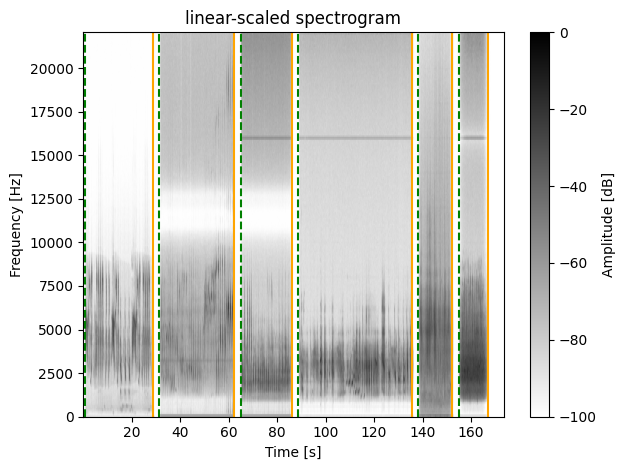

In [21]:
plot.plot_boundaries_on_spectrogram(x, sr, segments)

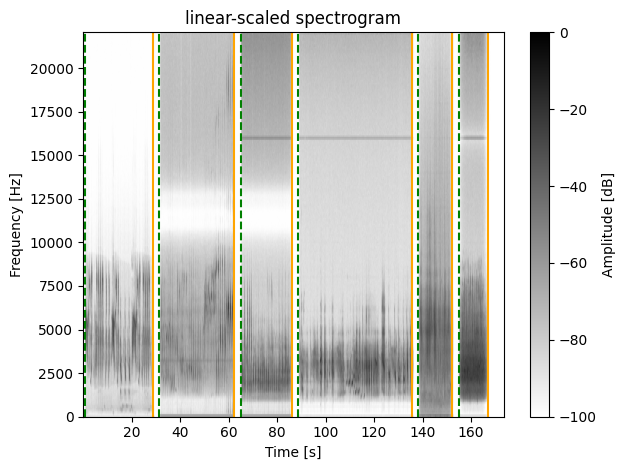

In [22]:
# or extract signal segments directly
audio_segments = handle.audio_segments_from_textgrid(x, sr, "Sturnus_vulgaris_Starling_10_20.TextGrid", "segments")

In [23]:
audio_segments

[{'data': array([ 6.1037019e-05, -9.1555528e-05,  3.0518509e-05, ...,
          1.8311106e-04,  3.6622211e-04,  3.6622211e-04],
        shape=(1245003,), dtype=float32),
  'label': '2'},
 {'data': array([ 3.0518509e-05, -9.1555528e-05,  6.1037019e-05, ...,
         -1.0376293e-03, -1.5869625e-03, -7.6296274e-04],
        shape=(1356398,), dtype=float32),
  'label': '3'},
 {'data': array([-3.9674062e-03, -2.3804437e-03, -8.7588122e-03, ...,
         -3.0518509e-05,  6.1037019e-05, -6.1037019e-05],
        shape=(920968,), dtype=float32),
  'label': '1'},
 {'data': array([ 1.8311106e-04,  9.1555528e-05,  2.7466659e-04, ...,
          3.8453322e-03,  2.3804437e-03, -3.9674062e-04],
        shape=(2061023,), dtype=float32),
  'label': '2'},
 {'data': array([-0.00015259,  0.0004883 ,  0.00030519, ..., -0.00030519,
         -0.00073244, -0.00030519], shape=(610204,), dtype=float32),
  'label': '0'},
 {'data': array([-0.00201422, -0.00271615, -0.00231941, ...,  0.0004883 ,
          0.0005798

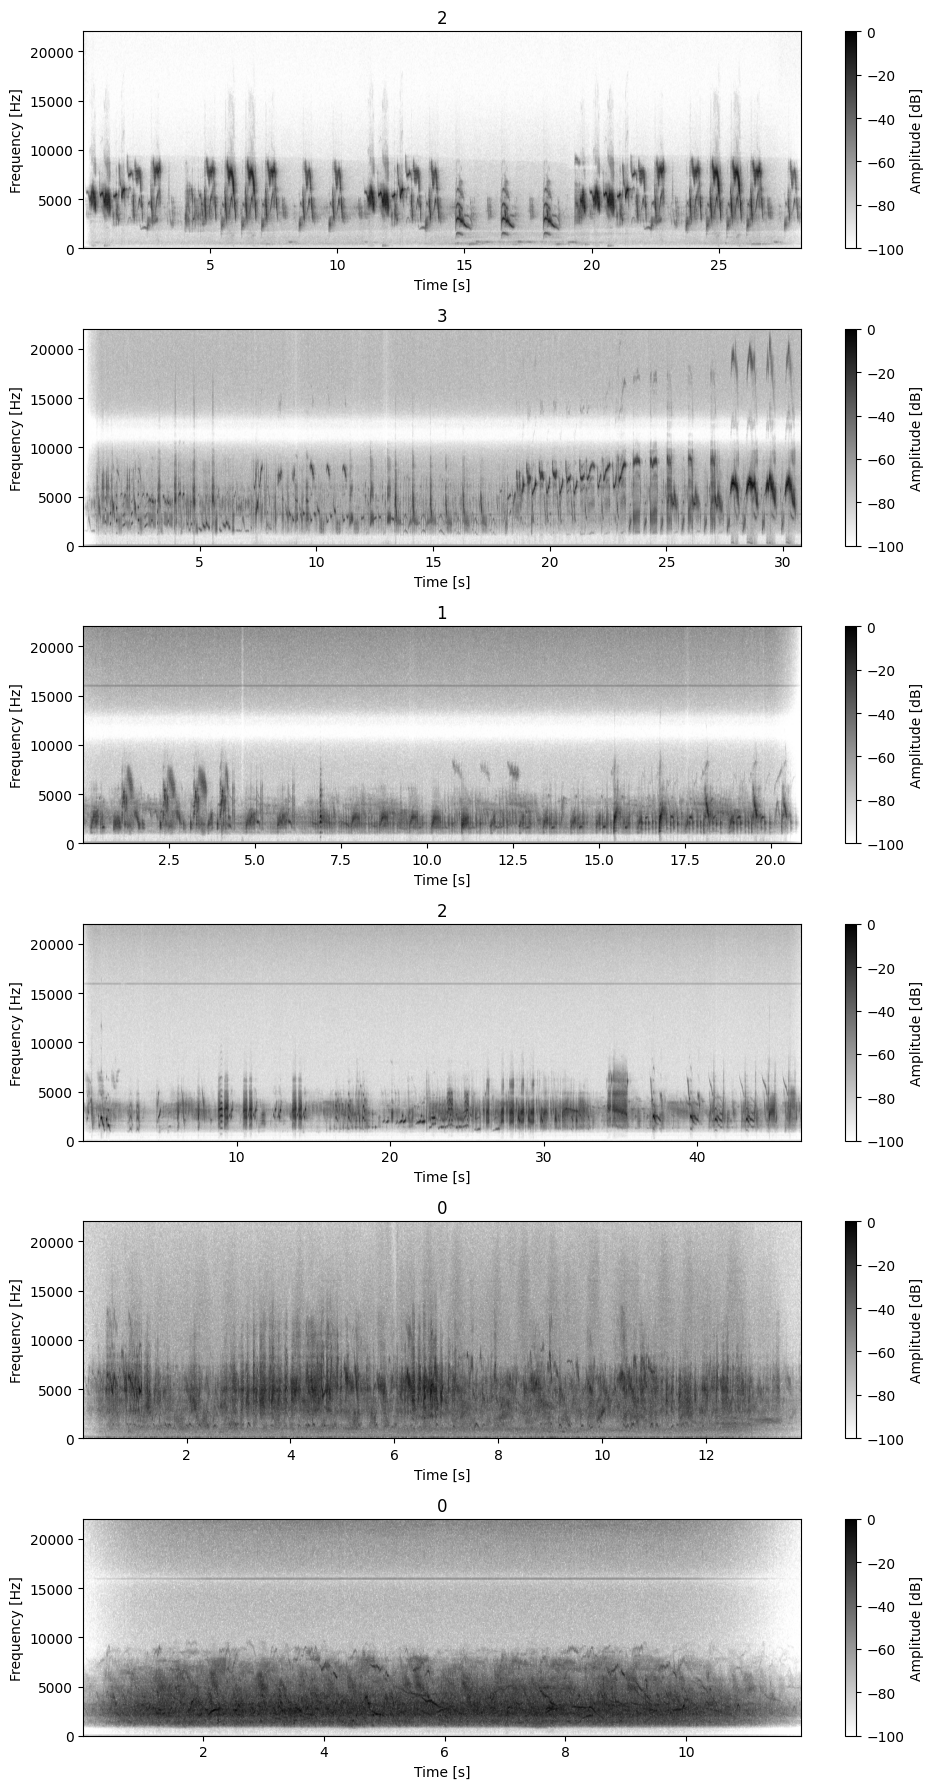

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(segments), 1, figsize=(10, 3 * len(segments)))

for i, segment in enumerate(audio_segments):
    plot.plot_spectrogram(segment["data"], sr, title=segment["label"], plot=(fig,axs[i]))

## Filter

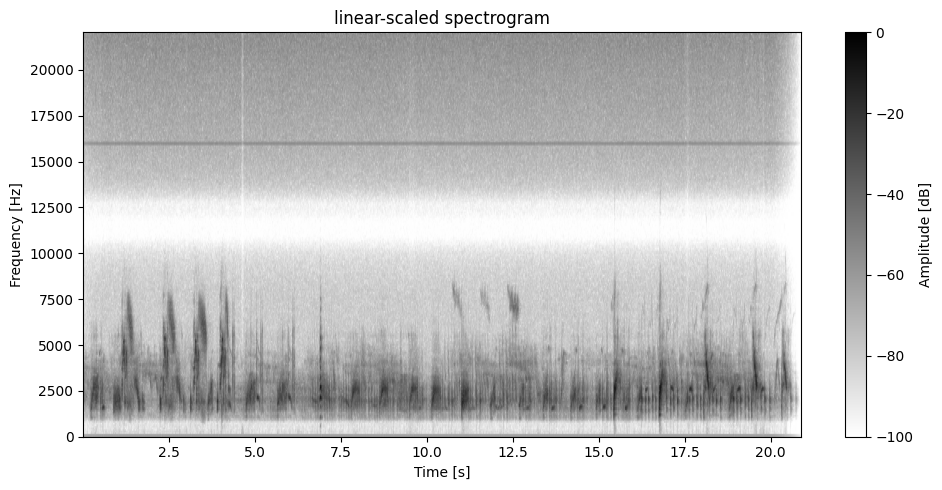

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'linear-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>)

In [25]:
x = audio_segments[2]["data"]
plot.plot_spectrogram(x, sr)

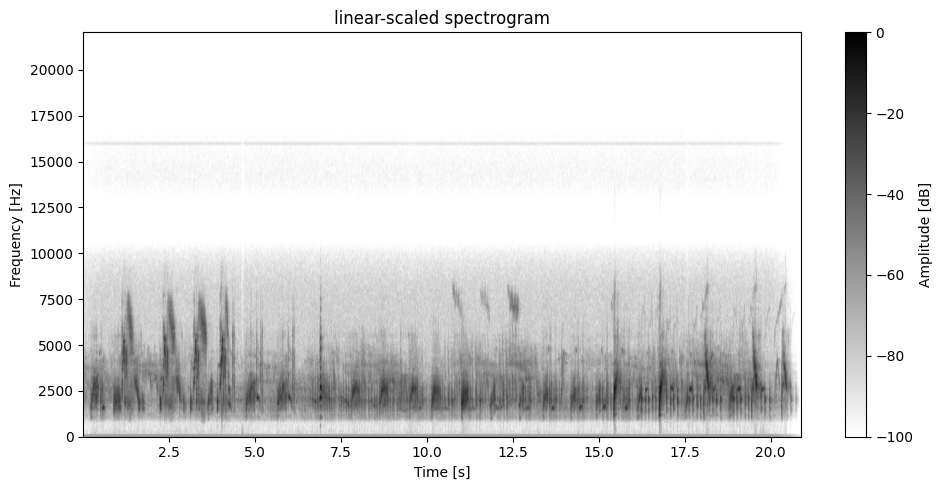

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'linear-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>)

In [26]:
from biosonic import filter

x_filtered = filter.filter(x, sr, f_cutoff = 10000, type="lowpass")
plot.plot_spectrogram(x_filtered, sr)

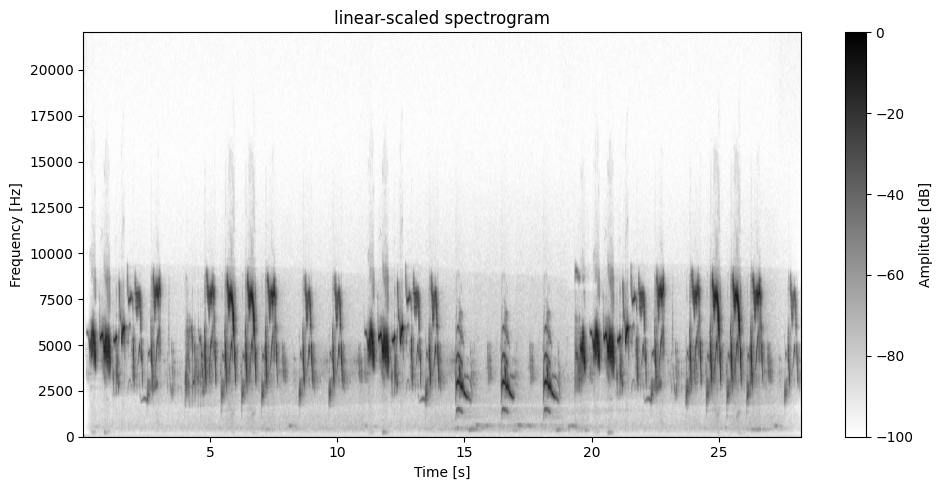

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'linear-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>)

In [27]:
x = audio_segments[0]["data"]
plot.plot_spectrogram(x, sr)

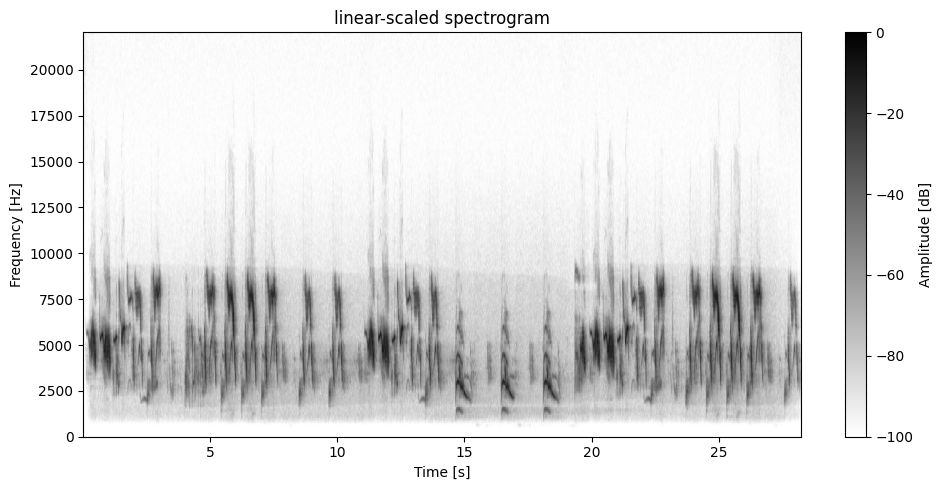

(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'linear-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>)

In [28]:
# change order for steeper frequency cutoff
x_filtered = filter.filter(x, sr, f_cutoff = 1000, type="highpass", order=4)
plot.plot_spectrogram(x_filtered, sr)

## Plot spectrogram catalogue from DataFrame with waveforms

In [29]:
df = handle.batch_read_files_to_df("normalized")
df.head()

processing GT00095.wav
processing Pica_pica_Magpie_12#45.wav
processing GT00092.wav
processing GT00211_G00908_Julian_distance.wav
processing Sturnus_vulgaris_Starling_10#20.wav


filename     sr  \
0                          GT00095.wav  44100   
1           Pica_pica_Magpie_12#45.wav  44100   
2                          GT00092.wav  44100   
3   GT00211_G00908_Julian_distance.wav  44100   
4  Sturnus_vulgaris_Starling_10#20.wav  44100   

                                            waveform  
0  [32.5, 22.5, 27.5, 32.5, 43.5, 43.5, 42.5, 32....  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [14.5, -27.5, -46.0, -79.5, -116.5, -148.0, -1...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

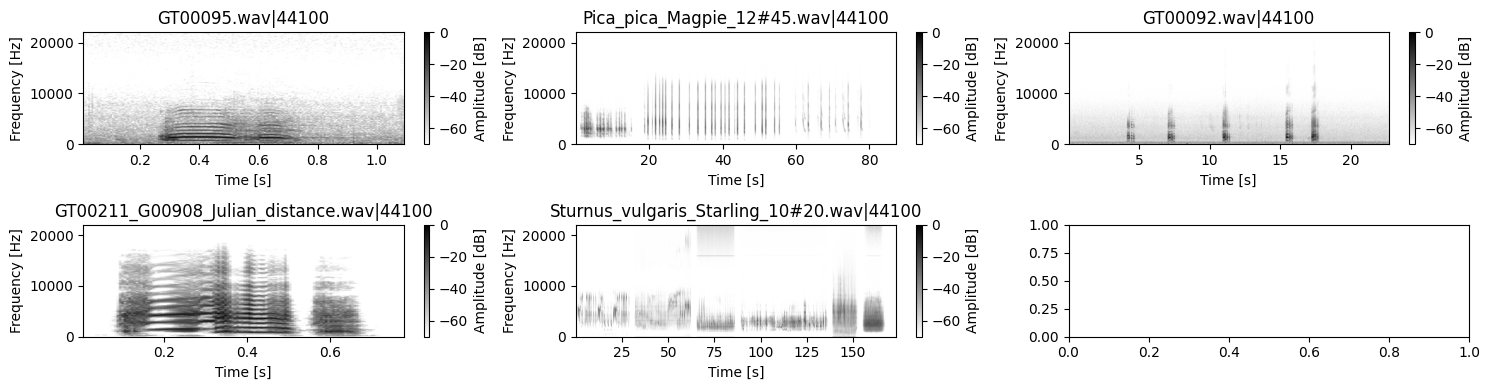

In [ ]:
plot.plot_spectrogram_catalogue(df, "waveform", ncols=3, title_columns=["filename", "sr"], dynamic_range=80)